# **Heart-Disease-Prediction**
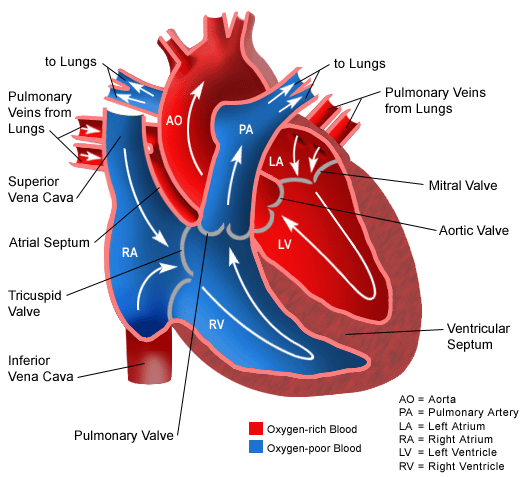

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
datos = pd.read_csv('heart.csv')
df = pd.DataFrame(datos)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- change a Sex column values for number. M = 1, F = 0.

# Exploratory Data Analysis (EDA)

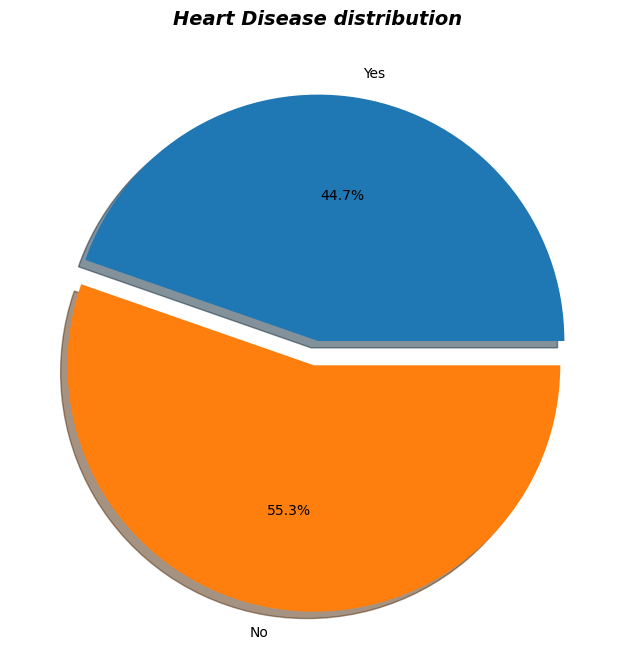

In [6]:
plt.figure(figsize=(12,8))
plt.pie(df['HeartDisease'].value_counts(sort=False), autopct='%1.1f%%', explode=[0, 0.1], shadow=True, labels=['Yes', 'No'])
plt.title('Heart Disease distribution', weight='bold', style='italic', fontsize=14);

C:\Users\Admin\AppData\Local\Temp\ipykernel_13220\320327320.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13220\320327320.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13220\320327320.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain availabl

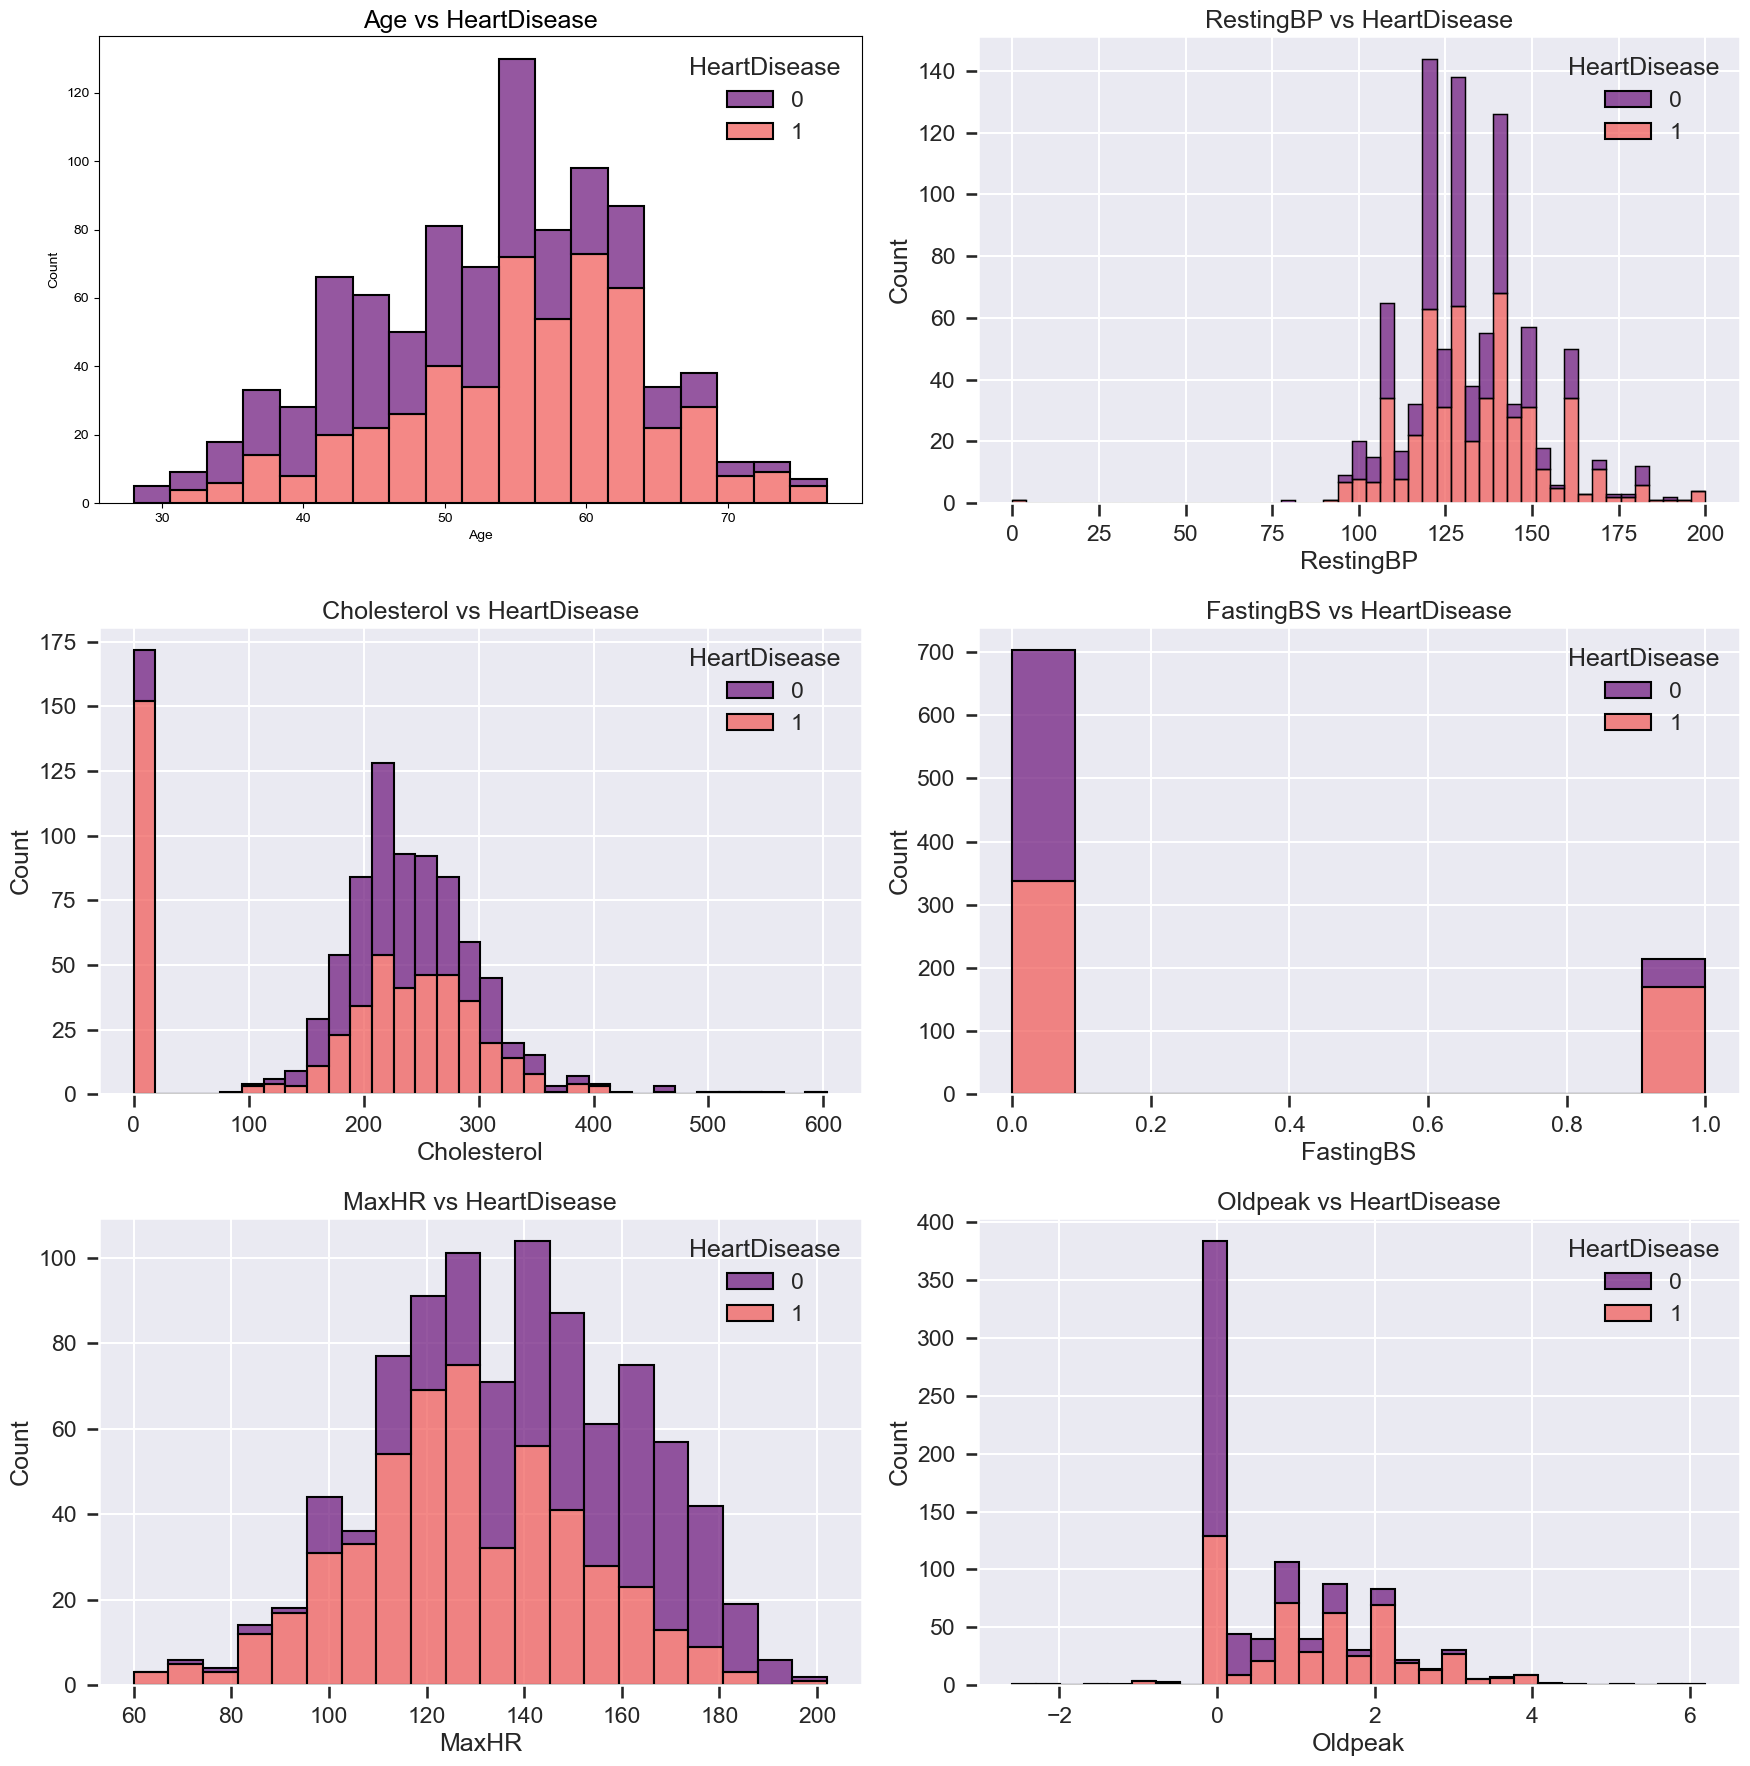

In [7]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

In [8]:
df['Sex'].replace({'F':0,'M':1},inplace=True)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


- Change a ChestPainType column values for number. ASY= 1, ATA= 2, NAP=3, TA=4.

In [9]:
df['ChestPainType'].replace({'ASY':1,'ATA':2,'NAP':3,'TA':4},inplace=True)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,3,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,2,130,283,0,ST,98,N,0.0,Up,0
3,48,0,1,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,3,150,195,0,Normal,122,N,0.0,Up,0


- Change a RestingECG column values for number. LVH= 1, Normal= 2, ST=3.

In [10]:
df['RestingECG'].replace({'LVH':1,'Normal':2,'ST':3},inplace=True)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,N,0.0,Up,0
1,49,0,3,160,180,0,2,156,N,1.0,Flat,1
2,37,1,2,130,283,0,3,98,N,0.0,Up,0
3,48,0,1,138,214,0,2,108,Y,1.5,Flat,1
4,54,1,3,150,195,0,2,122,N,0.0,Up,0


- Change a ExerciseAngina column values for number. N= 0, Y= 1.

In [11]:
df['ExerciseAngina'].replace({'N':0,'Y':1},inplace=True)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,0,0.0,Up,0
1,49,0,3,160,180,0,2,156,0,1.0,Flat,1
2,37,1,2,130,283,0,3,98,0,0.0,Up,0
3,48,0,1,138,214,0,2,108,1,1.5,Flat,1
4,54,1,3,150,195,0,2,122,0,0.0,Up,0


- Change a ST_Slope column values for number. Down= 1, Flat= 2, Up= 3.

In [12]:
df['ST_Slope'].replace({'Down':1,'Flat':2, 'Up':3},inplace=True)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,0,0.0,3,0
1,49,0,3,160,180,0,2,156,0,1.0,2,1
2,37,1,2,130,283,0,3,98,0,0.0,3,0
3,48,0,1,138,214,0,2,108,1,1.5,2,1
4,54,1,3,150,195,0,2,122,0,0.0,3,0


<a id='2'></a><br>
# Detect Outliers

In [13]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

In [14]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [15]:
len(outlier_index)

21

In [16]:
df.drop(outlier_index, inplace=True)

<a id='4'></a><br>
# Dealing with Imbalanced Data

In [17]:
from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

In [18]:
x = df.drop(['HeartDisease'], axis = 1)
y = df.loc[:,'HeartDisease'].values

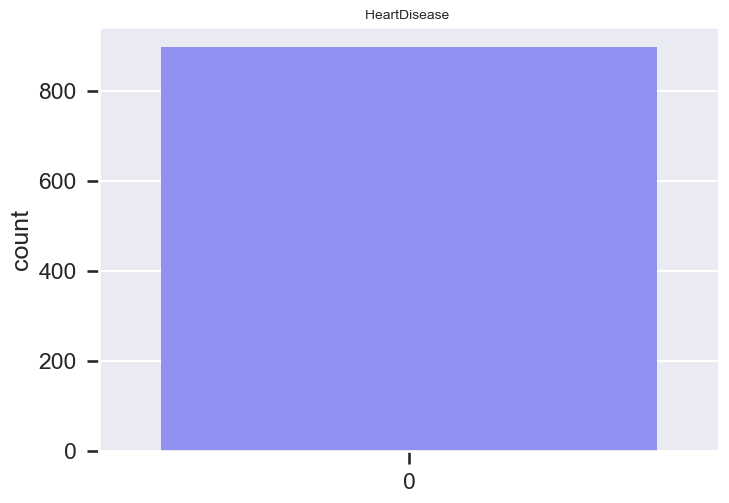

In [19]:
sns.countplot(df["HeartDisease"], palette="cool_r")
plt.title("HeartDisease ",fontsize=10)
plt.show()

In [20]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 493, 0: 404})
Resampled dataset shape Counter({0: 493, 1: 493})


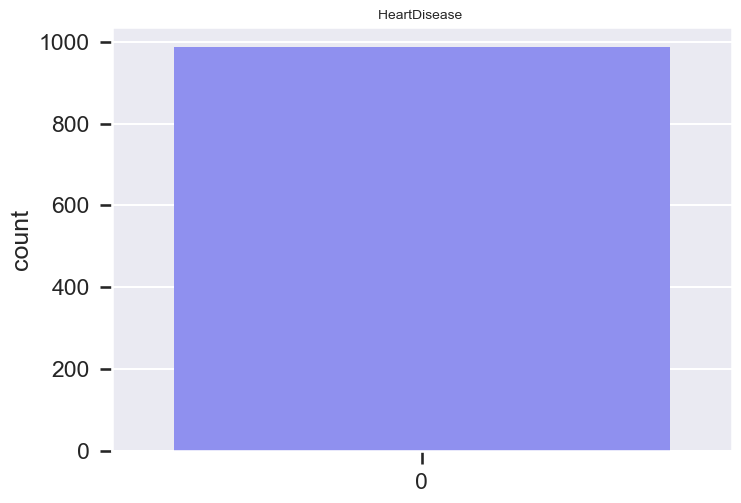

In [21]:
sns.countplot(y, palette='cool_r')
plt.title("HeartDisease ",fontsize=10)
plt.show()

<a id='5'></a><br>
# Data Scaling

In [22]:
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.42774965,  0.56563809,  0.22453695,  0.46448924,  0.870806  ,
        -0.51863597,  0.05815202,  1.37254591, -0.76665616, -0.80759242,
         1.00899201],
       [-0.46557997, -1.76791488,  1.28383566,  1.64228632, -0.20006767,
        -0.51863597,  0.05815202,  0.7321625 , -0.76665616,  0.15058123,
        -0.64086889],
       [-1.74847288,  0.56563809,  0.22453695, -0.1244093 ,  0.81185883,
        -0.51863597,  1.65087129, -1.58922737, -0.76665616, -0.80759242,
         1.00899201],
       [-0.57248771, -1.76791488, -0.83476177,  0.34670954,  0.13396632,
        -0.51863597,  0.05815202, -1.18898774,  1.30436569,  0.62966805,
        -0.64086889],
       [ 0.06895875,  0.56563809,  1.28383566,  1.05338778, -0.05269973,
        -0.51863597,  0.05815202, -0.62865225, -0.76665616, -0.80759242,
         1.00899201]])

<a id='7'></a><br>
# Train / Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Validation set:', X_test.shape,  Y_test.shape)

Train set: (788, 11) (788,)
Validation set: (198, 11) (198,)


<a id='8'></a><br>
# Classifiers

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

In [25]:
#pip install yellowbrick

# Random Forest Classifier

In [26]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train,Y_train)
predicted = r_forest.predict(X_test)
score = r_forest.score(X_test, Y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.904


<a id='15'></a><br>
### Confusion Matrix

In [27]:
classes = ['Normal', 'Heart_Disease']
# 0=Normal, 1=Heart_Disease

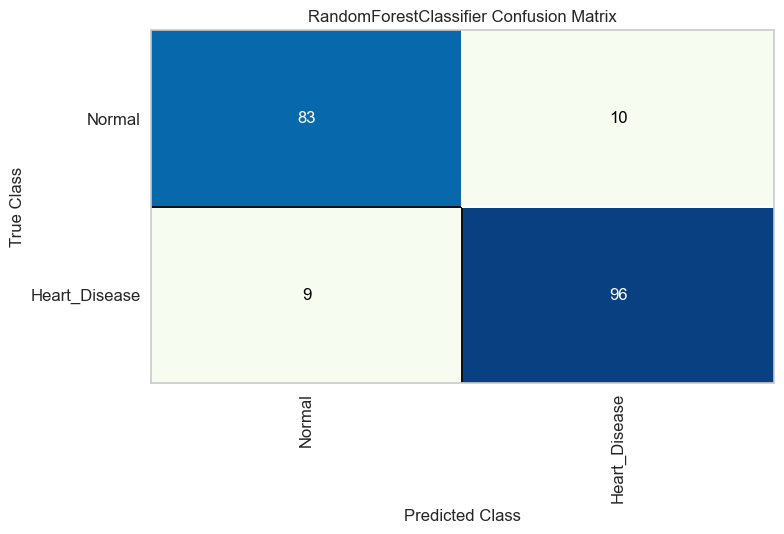

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(X_train, Y_train)
r_forest_cm.score(X_test, Y_test)
r_forest_cm.show()

<a id='16'></a><br>
### Classification Report

In [29]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        93
           1       0.91      0.91      0.91       105

    accuracy                           0.90       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.90      0.90      0.90       198



# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)
lr_predicted = LR.predict(X_test)
score = LR.score(X_test, Y_test)
lr_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.904


<a id='15'></a><br>
### Confusion Matrix

In [31]:
classes = ['Normal', 'Heart_Disease']
# 0=Normal, 1=Heart_Disease

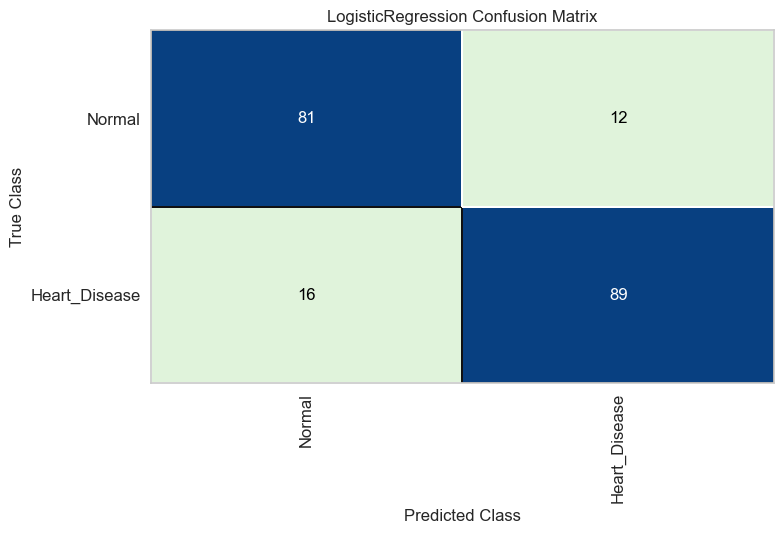

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
lf_cm = ConfusionMatrix(LR, classes=classes, cmap='GnBu')

lf_cm.fit(X_train, Y_train)
lf_cm.score(X_test, Y_test)
lf_cm.show()

<a id='16'></a><br>
### Classification Report

In [33]:
print(classification_report(Y_test, lr_predicted))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        93
           1       0.88      0.85      0.86       105

    accuracy                           0.86       198
   macro avg       0.86      0.86      0.86       198
weighted avg       0.86      0.86      0.86       198



# KNN - Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [35]:
# predict the values using the training data
knn_predict = classifier.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Training Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, knn_predict)*100))
print()

Training Accuracy: 85.8586



              precision    recall  f1-score   support

           0       0.84      0.87      0.85        93
           1       0.88      0.85      0.86       105

    accuracy                           0.86       198
   macro avg       0.86      0.86      0.86       198
weighted avg       0.86      0.86      0.86       198



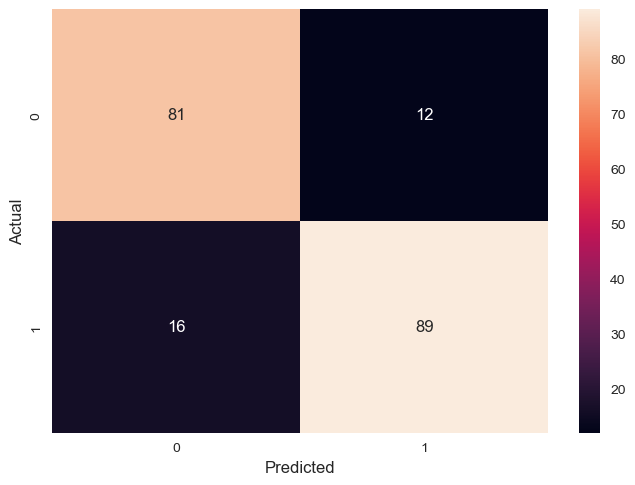

In [36]:
print(classification_report(Y_test, knn_predict))
cm = confusion_matrix(Y_test, knn_predict)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual');

# Support Vector Machine (SVC)

In [37]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=0, probability=True)

In [38]:
svc.fit(X_train, Y_train)

SVC(probability=True, random_state=0)

In [39]:
pred_svc = svc.predict(X_test)

In [40]:
from sklearn import metrics

# Accuracy
print("Training Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, pred_svc)))
print()

Training Accuracy: 0.8889



In [41]:
print(classification_report(Y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        93
           1       0.89      0.90      0.90       105

    accuracy                           0.89       198
   macro avg       0.89      0.89      0.89       198
weighted avg       0.89      0.89      0.89       198



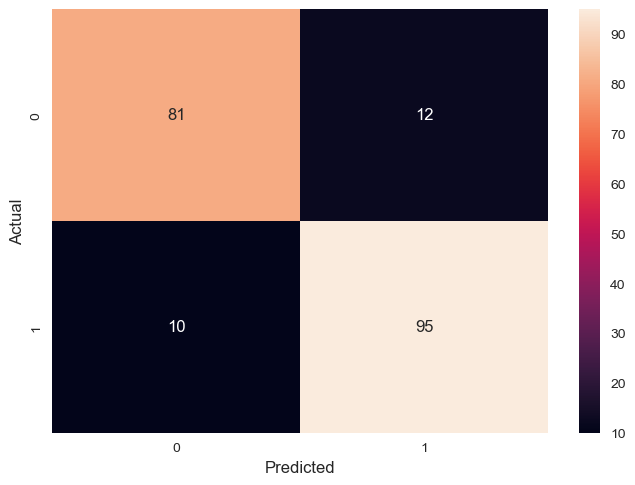

In [42]:
cm = confusion_matrix(Y_test, pred_svc)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual');

# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [44]:
predic_tree = tree_clf.predict(X_test)

In [45]:
print("Training Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, predic_tree)))
print()

Training Accuracy: 0.7929



              precision    recall  f1-score   support

           0       0.78      0.78      0.78        93
           1       0.81      0.80      0.80       105

    accuracy                           0.79       198
   macro avg       0.79      0.79      0.79       198
weighted avg       0.79      0.79      0.79       198



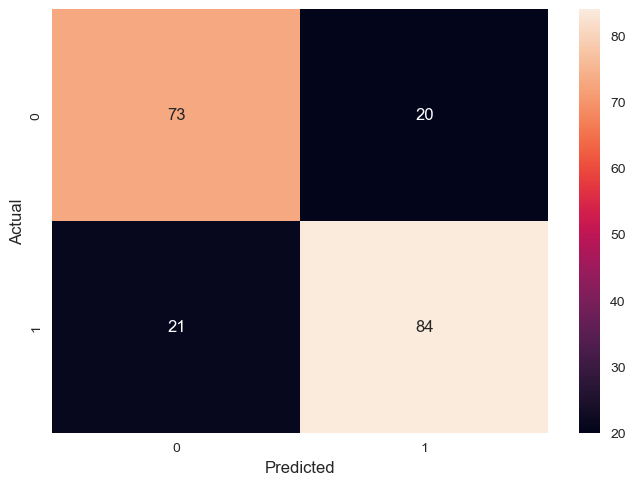

In [46]:
print(classification_report(Y_test, predic_tree))
cm = confusion_matrix(Y_test, predic_tree)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual');


# Accuracy Comparision Models

In [47]:
sns.set(context='notebook', style=None, palette='tab10')

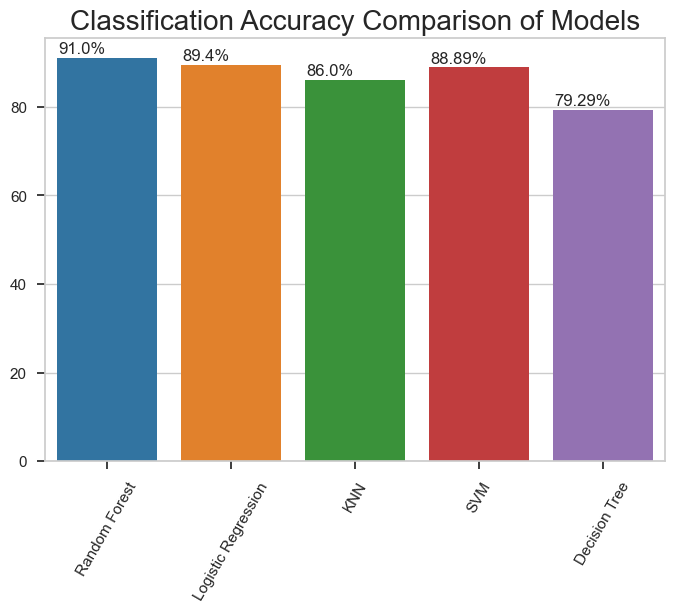

In [48]:
models = ['Random Forest','Logistic Regression','KNN','SVM','Decision Tree']
scores = [91,89.40,86, 88.89, 79.29]
ax = sns.barplot(x=models, y=scores)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(60)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+1))

**Here the Random Forest gives highest accuracy. So, we used this model for prediction for real time data.**

# **Prediction  of the Model**

##**Prediction_1**

In [49]:
input_data = (40, 1,	2,	140,	289,	0,	2, 172,	0,	0.0,	3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = r_forest.predict(input_data_reshaped)
print(prediction1)

if (prediction1== 1):
   print('The Person has Heart Disease')
else:
   print('The Person does not have a Heart Disease')


[0]
The Person does not have a Heart Disease


##**Prediction_2**

In [58]:
input_data = (42,	1,	3,	115,	211,	0,	3,	137,	0,	0,	0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only o instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction2 = r_forest.predict(input_data_reshaped)
print(prediction2)

if (prediction2== 1):
   print('The Person has Heart Disease')
else:
   print('The Person does not have a Heart Disease')


[1]
The Person has Heart Disease


In [51]:
import pickle

In [52]:
filename='Heart.pkl'
pickle.dump(r_forest,open(filename,'wb'))

In [53]:
loaded_model=pickle.load(open("Heart.pkl",'rb'))